In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the sales data
sales_data = pd.read_csv('financial_raw_data.csv')

In [2]:
sales_data.isnull().sum()


Unnamed: 0                                 0
transaction                                0
product_id                                 0
product_name                               0
exchange_rate_currency_payout              0
source                                     0
user_name                                  0
user_ucode                                 0
commission_currency_code                   0
commission_value                           0
purchase_approved_date                  2863
purchase_commission_as                     0
purchase_hotmart_fee_base                  0
purchase_hotmart_fee_total                 0
purchase_hotmart_fee_currency_code         0
purchase_hotmart_fee_fixed                 0
purchase_is_subscription                   0
purchase_offer_code                        0
purchase_offer_payment_mode                0
purchase_order_datetime                    0
purchase_order_date                        0
purchase_order_time                        0
purchases_

In [ ]:
sales_data = sales_data.dropna(axis=1)

In [3]:
sales_data.isnull().sum()

Unnamed: 0                              0
transaction                             0
product_id                              0
product_name                            0
exchange_rate_currency_payout           0
source                                  0
user_name                               0
user_ucode                              0
commission_currency_code                0
commission_value                        0
purchase_commission_as                  0
purchase_hotmart_fee_base               0
purchase_hotmart_fee_total              0
purchase_hotmart_fee_currency_code      0
purchase_hotmart_fee_fixed              0
purchase_is_subscription                0
purchase_offer_code                     0
purchase_offer_payment_mode             0
purchase_order_datetime                 0
purchase_order_date                     0
purchase_order_time                     0
purchases_order_time                    0
purchase_payment_method                 0
purchase_payment_type             

In [3]:
sales_data = sales_data.loc[:, ['product_id', 'purchase_order_date','purchases_order_time']]
sales_data

,product_id,purchase_order_date,purchases_order_time
0,1689354,8/29/2022,16:27:08
1,1689354,8/29/2022,16:27:08
2,1689354,5/16/2022,1:20:58
3,1689354,5/16/2022,1:20:58
4,2383492,10/18/2022,12:58:26
...,...,...,...
7129,1679943,11/25/2021,16:26:35
7130,2196725,7/14/2022,1:04:46
7131,2196725,7/14/2022,1:04:46
7132,2196725,7/14/2022,1:04:46


<AxesSubplot:>

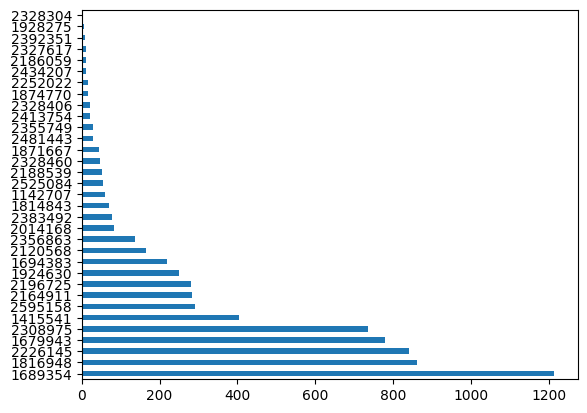

In [5]:
sales_data['product_id'].value_counts().plot(kind='barh')

In [6]:
X_count = sales_data.product_id.value_counts()
X_count = X_count[X_count > 500]
X_count

1689354    1214
1816948     862
2226145     842
1679943     780
2308975     736
Name: product_id, dtype: int64

<AxesSubplot:>

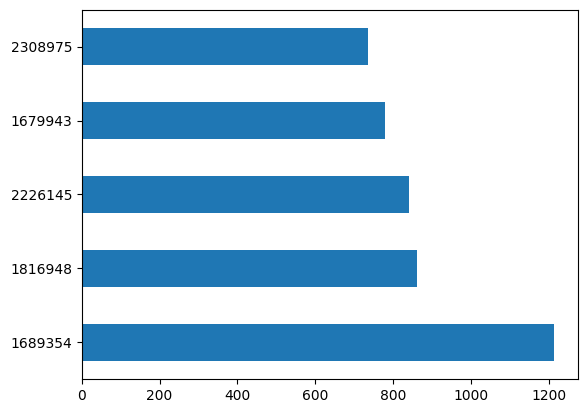

In [7]:
X_count.plot(kind='barh')

In [8]:
sales_data.shape

(7134, 4)

In [9]:
sales_data_cleaned = sales_data[sales_data['product_id'].isin(X_count[X_count > 500].index)]

In [10]:
# sales_data_cleaned.to_csv('sales_data_cleaned.csv',index=None)

In [12]:
sales_data_cleaned.product_id.value_counts()

1689354    1214
1816948     862
2226145     842
1679943     780
2308975     736
Name: product_id, dtype: int64

In [17]:
sales_data_cleaned.shape

(2334, 4)

In [18]:
sales_data_cleaned['selling_datetime'] = pd.to_datetime(sales_data_cleaned['purchase_order_date'] + ' ' + sales_data_cleaned['purchases_order_time'])

In [19]:
sales_data_cleaned['hour'] = sales_data_cleaned['selling_datetime'].dt.hour
sales_data_cleaned['dayofweek'] = sales_data_cleaned['selling_datetime'].dt.dayofweek

In [20]:
sales_data_cleaned

,product_id,purchase_price_value,purchase_order_date,purchases_order_time,selling_datetime,hour,dayofweek
126,2308975,2947.00,2/11/2023,19:36:00,2023-02-11 19:36:00,19,5
127,2308975,2947.00,2/11/2023,19:36:00,2023-02-11 19:36:00,19,5
128,2308975,2947.00,2/11/2023,19:36:00,2023-02-11 19:36:00,19,5
129,2308975,2947.00,2/11/2023,19:36:00,2023-02-11 19:36:00,19,5
130,2308975,2947.00,2/5/2023,20:19:17,2023-02-05 20:19:17,20,6
...,...,...,...,...,...,...,...
7011,2308975,2446.89,2/5/2023,23:53:20,2023-02-05 23:53:20,23,6
7012,2308975,2446.89,2/5/2023,19:36:33,2023-02-05 19:36:33,19,6
7013,2308975,2446.89,2/5/2023,19:36:33,2023-02-05 19:36:33,19,6
7014,2308975,2446.89,2/5/2023,19:36:33,2023-02-05 19:36:33,19,6


In [21]:
# sales_data_cleaned = sales_data_cleaned.append(sales_data_cleaned, ignore_index = True)
# sales_data_cleaned = sales_data_cleaned.append(sales_data_cleaned, ignore_index = True)
# sales_data_cleaned = sales_data_cleaned.append(sales_data_cleaned, ignore_index = True)

In [22]:
from sklearn.utils import shuffle

sales_data_cleaned = shuffle(sales_data_cleaned)

In [23]:
sales_data_cleaned

,product_id,purchase_price_value,purchase_order_date,purchases_order_time,selling_datetime,hour,dayofweek
3722,1816948,714.96,11/14/2022,17:12:00,2022-11-14 17:12:00,17,0
1891,1689354,597.00,5/18/2022,22:41:10,2022-05-18 22:41:10,22,2
2482,1816948,99.50,10/13/2022,14:35:14,2022-10-13 14:35:14,14,3
6052,2226145,1195.08,10/27/2022,00:44:49,2022-10-27 00:44:49,0,3
3627,1816948,714.96,3/9/2023,01:15:04,2023-03-09 01:15:04,1,3
...,...,...,...,...,...,...,...
617,1679943,997.00,6/23/2022,00:23:59,2022-06-23 00:23:59,0,3
6955,2308975,2446.89,2/6/2023,14:03:14,2023-02-06 14:03:14,14,0
6199,2226145,1195.08,10/27/2022,01:59:26,2022-10-27 01:59:26,1,3
2342,1689354,397.00,10/6/2021,23:48:13,2021-10-06 23:48:13,23,2


In [24]:
X = sales_data_cleaned[['product_id']]
y = sales_data_cleaned[['hour', 'dayofweek']]

In [25]:
X.head()

,product_id
3722,1816948
1891,1689354
2482,1816948
6052,2226145
3627,1816948


In [26]:
y_hour = y['hour']
y_hour.head()

3722    17
1891    22
2482    14
6052     0
3627     1
Name: hour, dtype: int64

In [27]:
y_dayofweek = y.dayofweek
y_dayofweek

3722    0
1891    2
2482    3
6052    3
3627    3
       ..
617     3
6955    0
6199    3
2342    2
6097    2
Name: dayofweek, Length: 2334, dtype: int64

In [28]:
X_train, X_test, y_hour_train, y_hour_test = train_test_split(X, y_hour, test_size=0.1, random_state=42)

In [29]:
X_train, X_test, y_dow_train, y_dow_test = train_test_split(X, y_dayofweek, test_size=0.1, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_hour_train)

GradientBoostingRegressor(random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model1 = GradientBoostingRegressor(random_state=42)
model1.fit(X_train, y_dow_train)

GradientBoostingRegressor(random_state=42)

In [32]:
import numpy as np
product_id = input('Enter the Product ID (Format: 7- Digit (XXXXXXX) ): ')

features = np.array([[product_id]])

print(f'Maximum sale on the Hour: {int(model.predict(features)[0])}')
print(f'Maximum Sale of the Day of the week: {int(model1.predict(features)[0])}')

Maximum sale on the Hour: 11
Maximum Sale of the Day of the week: 2


C:\Users\aleem\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\aleem\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
